In [1]:
import numpy as np
from uncertainties import ufloat
import uncertainties.unumpy as unp 
from uncertainties.unumpy import (nominal_values as noms, std_devs as stds)
import matplotlib
font = {'size': 11.0}
matplotlib.rc('font', **font)
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from pylab import *
import os

In [2]:
path = './data/Wasserstoffatom/Ohne_Ring'
sav_path="./plots/PLOTS/mess_cs_long"
files = os.listdir(path)
D2=[4.896,4.210,3.480,2.803,0.771,0.712,1.789,3.024,5.671,7.205,10.182,9.851,15.075,17,18.952,17.812,21.649,19.413,21.426]#2,301kHz
D3=[0]*18#3,694kHz
D4=[0]*18#4,979kHz
D7=[0]*18#7,433kHz
a=np.arange(0,185,10)#winkel

print(files)
print(a)
#for f in files:
#    temp_f,temp_D=np.genfromtxt(f"{path}/{f}",delimiter=" ")
#    index2=temp_f.index("2.300")
#    D2.append(temp_D[index])
#print(D2)

['Spektrum_180.dat', 'Spektrum_020.dat', 'Spektrum_140.dat', 'Spektrum_180_first.dat', 'Spektrum_150.dat', 'Spektrum_030.dat', 'Spektrum_180_first.png', 'Spektrum_040.dat', 'Spektrum_120.dat', 'Spektrum_080.dat', 'Spektrum_090.dat', 'Spektrum_130.dat', 'Spektrum_050.dat', 'Spektrum_100.dat', 'Spektrum_060.dat', 'Spektrum_180_first.bmp', 'Spektrum_070.dat', 'Spektrum_110.dat', 'Spektrum_160.dat', 'Spektrum_000.dat', 'Spektrum_010.dat', 'Spektrum_170.dat', 'Resonanzen.txt']
[  0  10  20  30  40  50  60  70  80  90 100 110 120 130 140 150 160 170
 180]


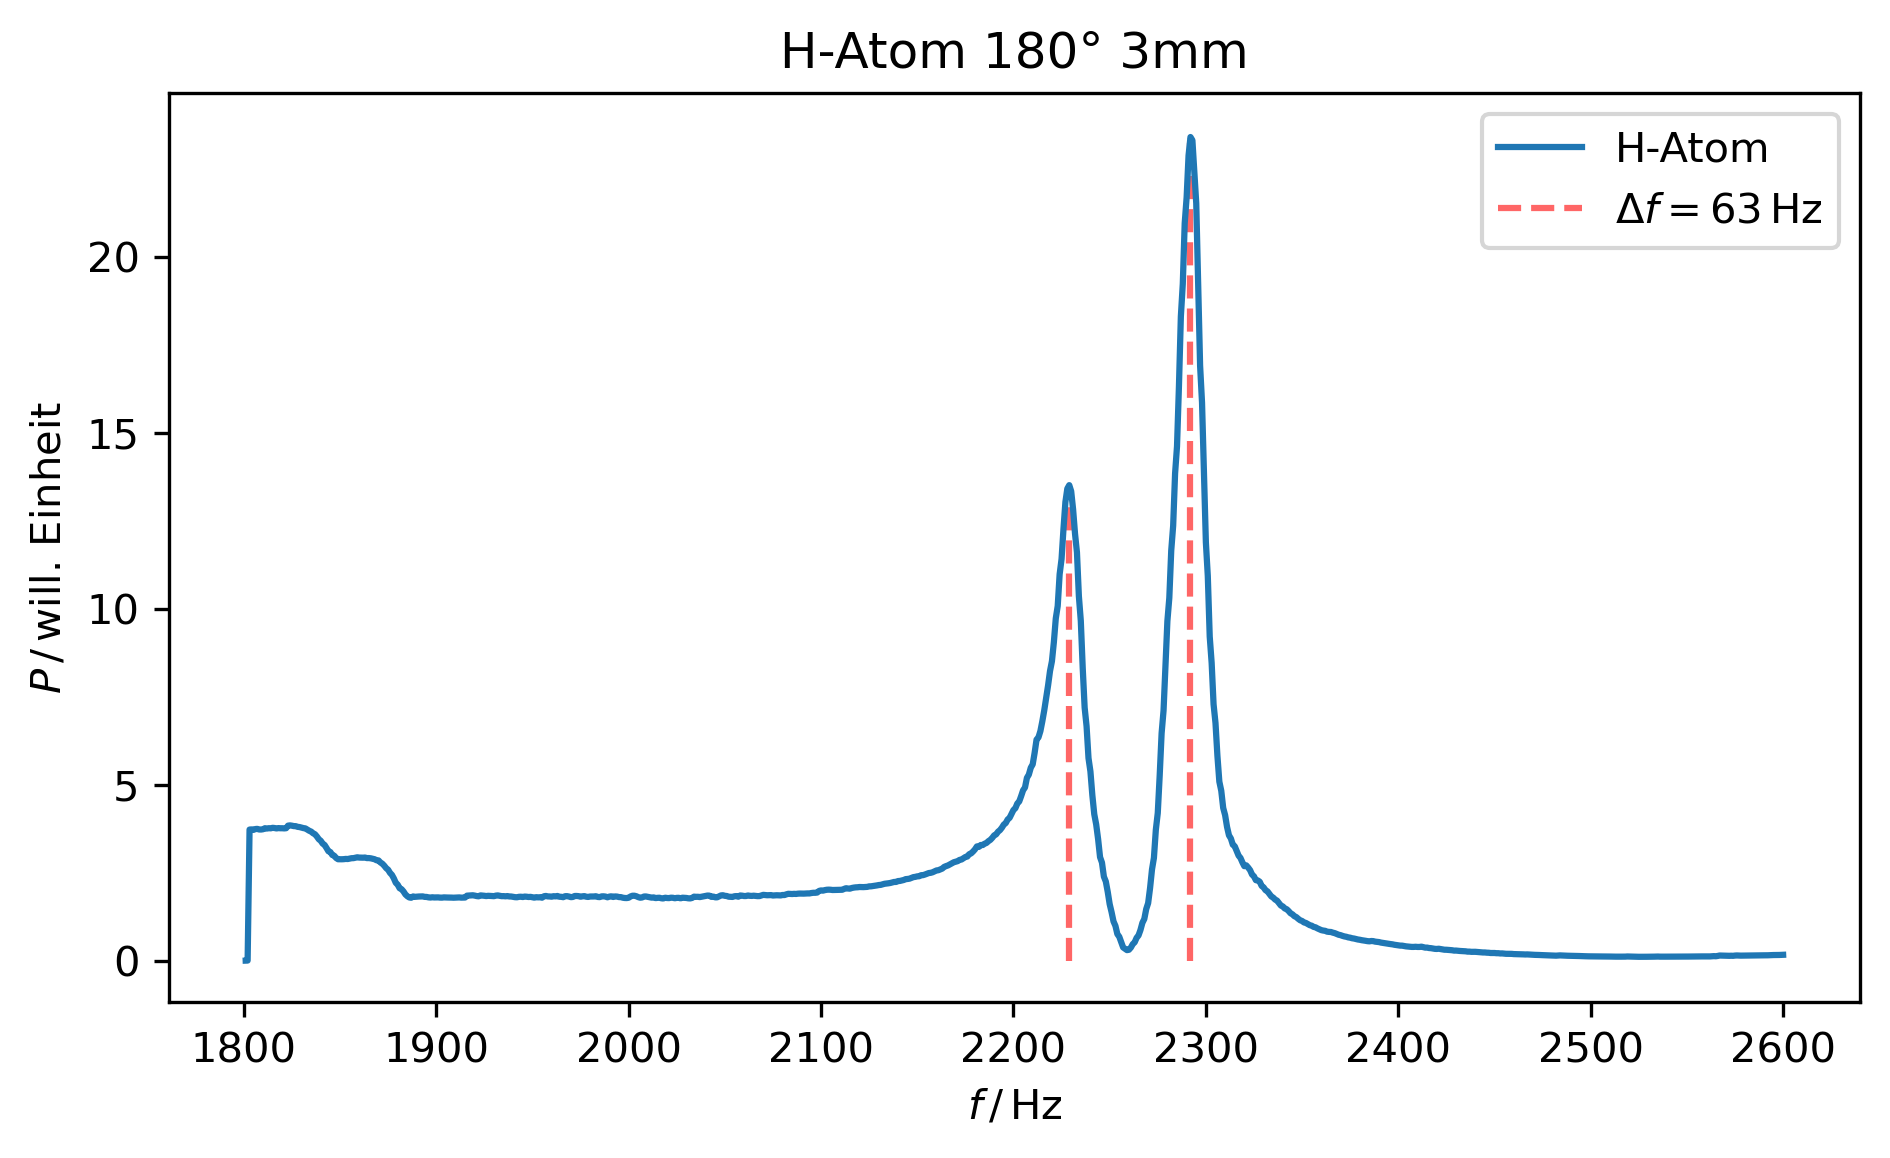

In [3]:
#Zustandsaufspaltung
f=np.genfromtxt("data/Wasserstoffatom/Ring/Spektrum_Ring_3mm.txt",skip_header=1,usecols=(0))
D=np.genfromtxt("data/Wasserstoffatom/Ring/Spektrum_Ring_3mm.txt",skip_header=1,usecols=(1))

plt.figure(figsize=(6.4,3.96),dpi=300)
plt.title("H-Atom 180° 3mm")
plt.plot(f,D,label="H-Atom")
vlines(2292, 0, 23.5, colors='r', linestyles='--',alpha=0.6)
vlines(2229, 0, 13.5, colors='r', linestyles='--',alpha=0.6,label=r"$\Delta f=63\,$Hz")
plt.ylabel(r"$P\,/\,$will. Einheit")
plt.xlabel(r"$f\,/\,$Hz")
plt.legend(loc="best")
plt.tight_layout()
#plt.savefig("plots/Hatom/zustandsaufspaltung.pdf",bbox_inches = "tight")

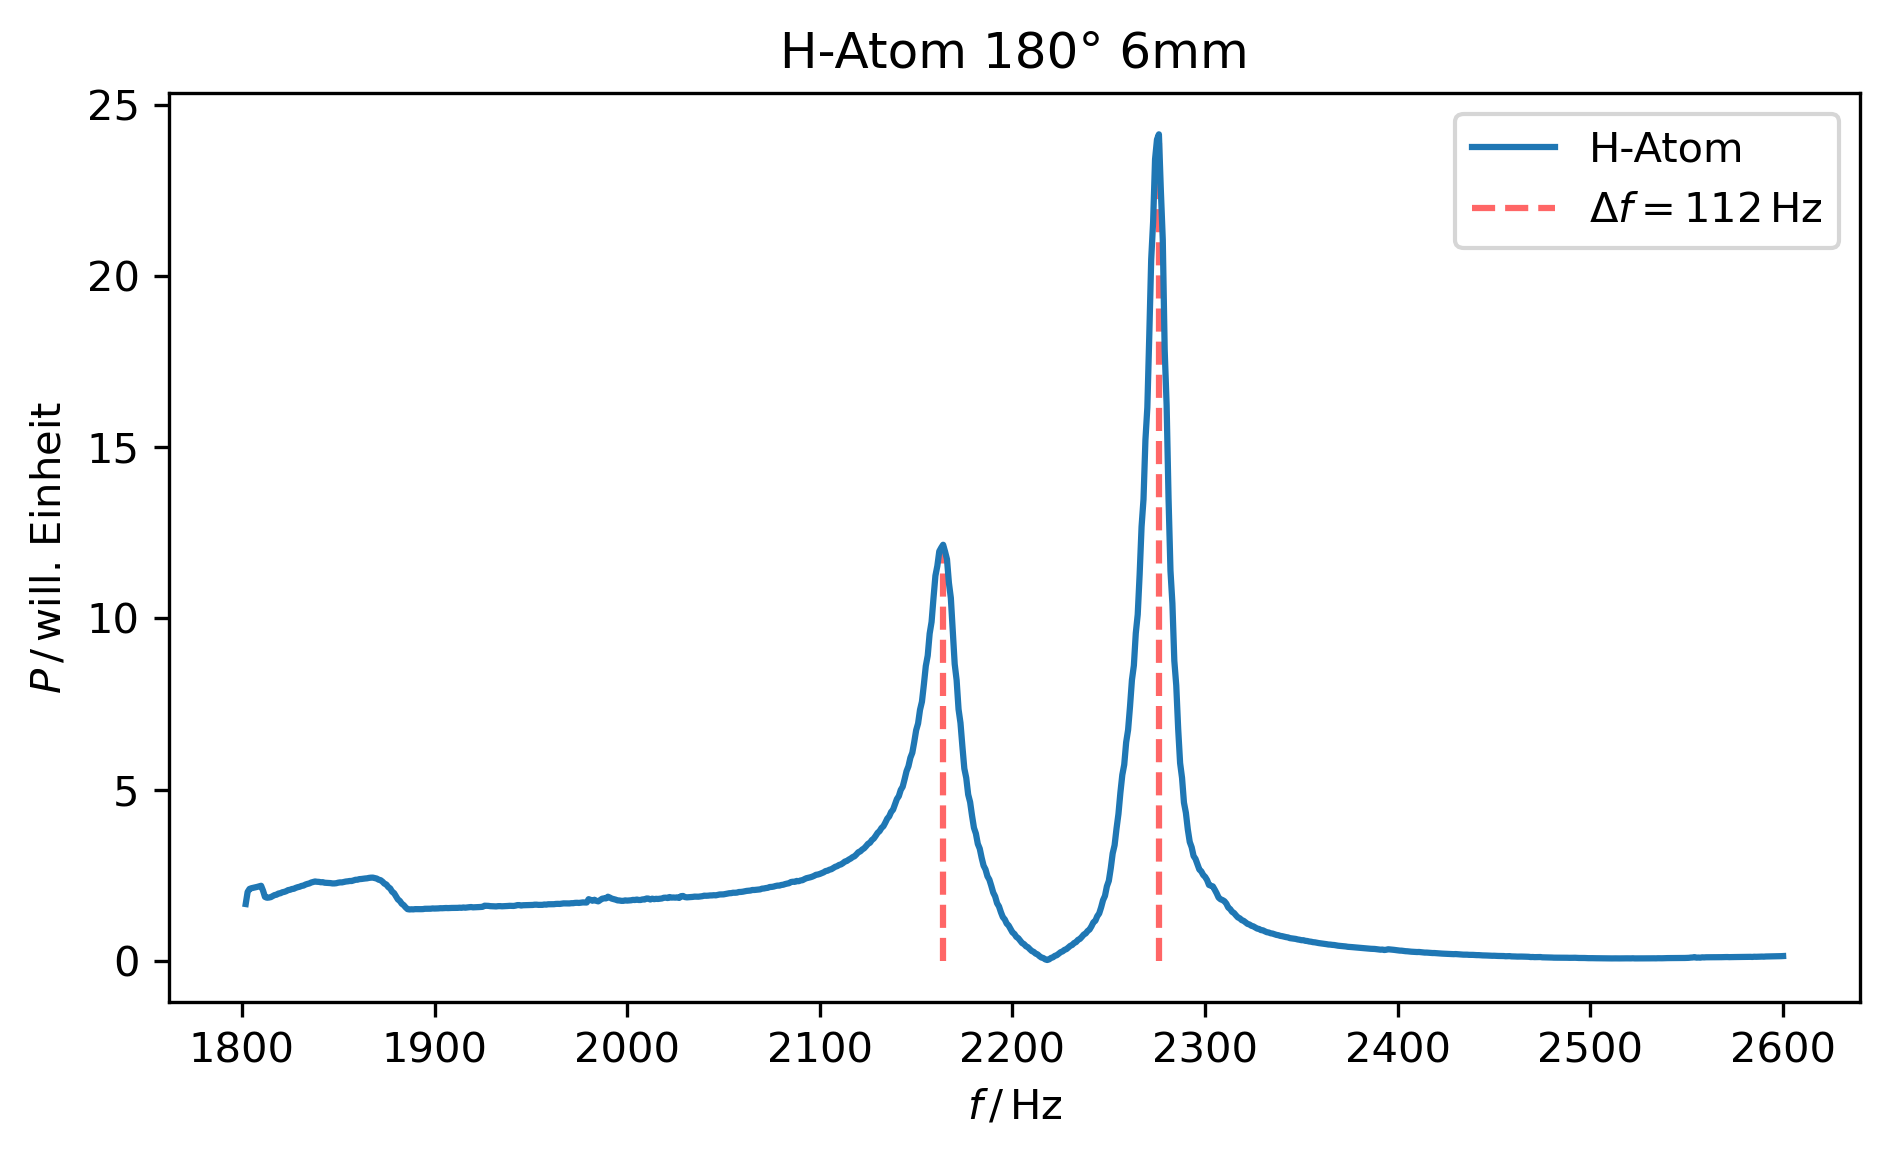

In [4]:
f=np.genfromtxt("data/Wasserstoffatom/Ring/Spektrum_Ring_6mm.dat",skip_header=1,usecols=(0))
D=np.genfromtxt("data/Wasserstoffatom/Ring/Spektrum_Ring_6mm.dat",skip_header=1,usecols=(1))

plt.figure(figsize=(6.4,3.96),dpi=300)
plt.title("H-Atom 180° 6mm")
plt.plot(f,D,label="H-Atom")
vlines(2276, 0, 24.1, colors='r', linestyles='--',alpha=0.6)
vlines(2164, 0, 12.1, colors='r', linestyles='--',alpha=0.6,label=r"$\Delta f=112\,$Hz")
plt.ylabel(r"$P\,/\,$will. Einheit")
plt.xlabel(r"$f\,/\,$Hz")
plt.legend(loc="best")
plt.tight_layout()
#plt.savefig("plots/Hatom/zustandsaufspaltung_6.pdf",bbox_inches = "tight")

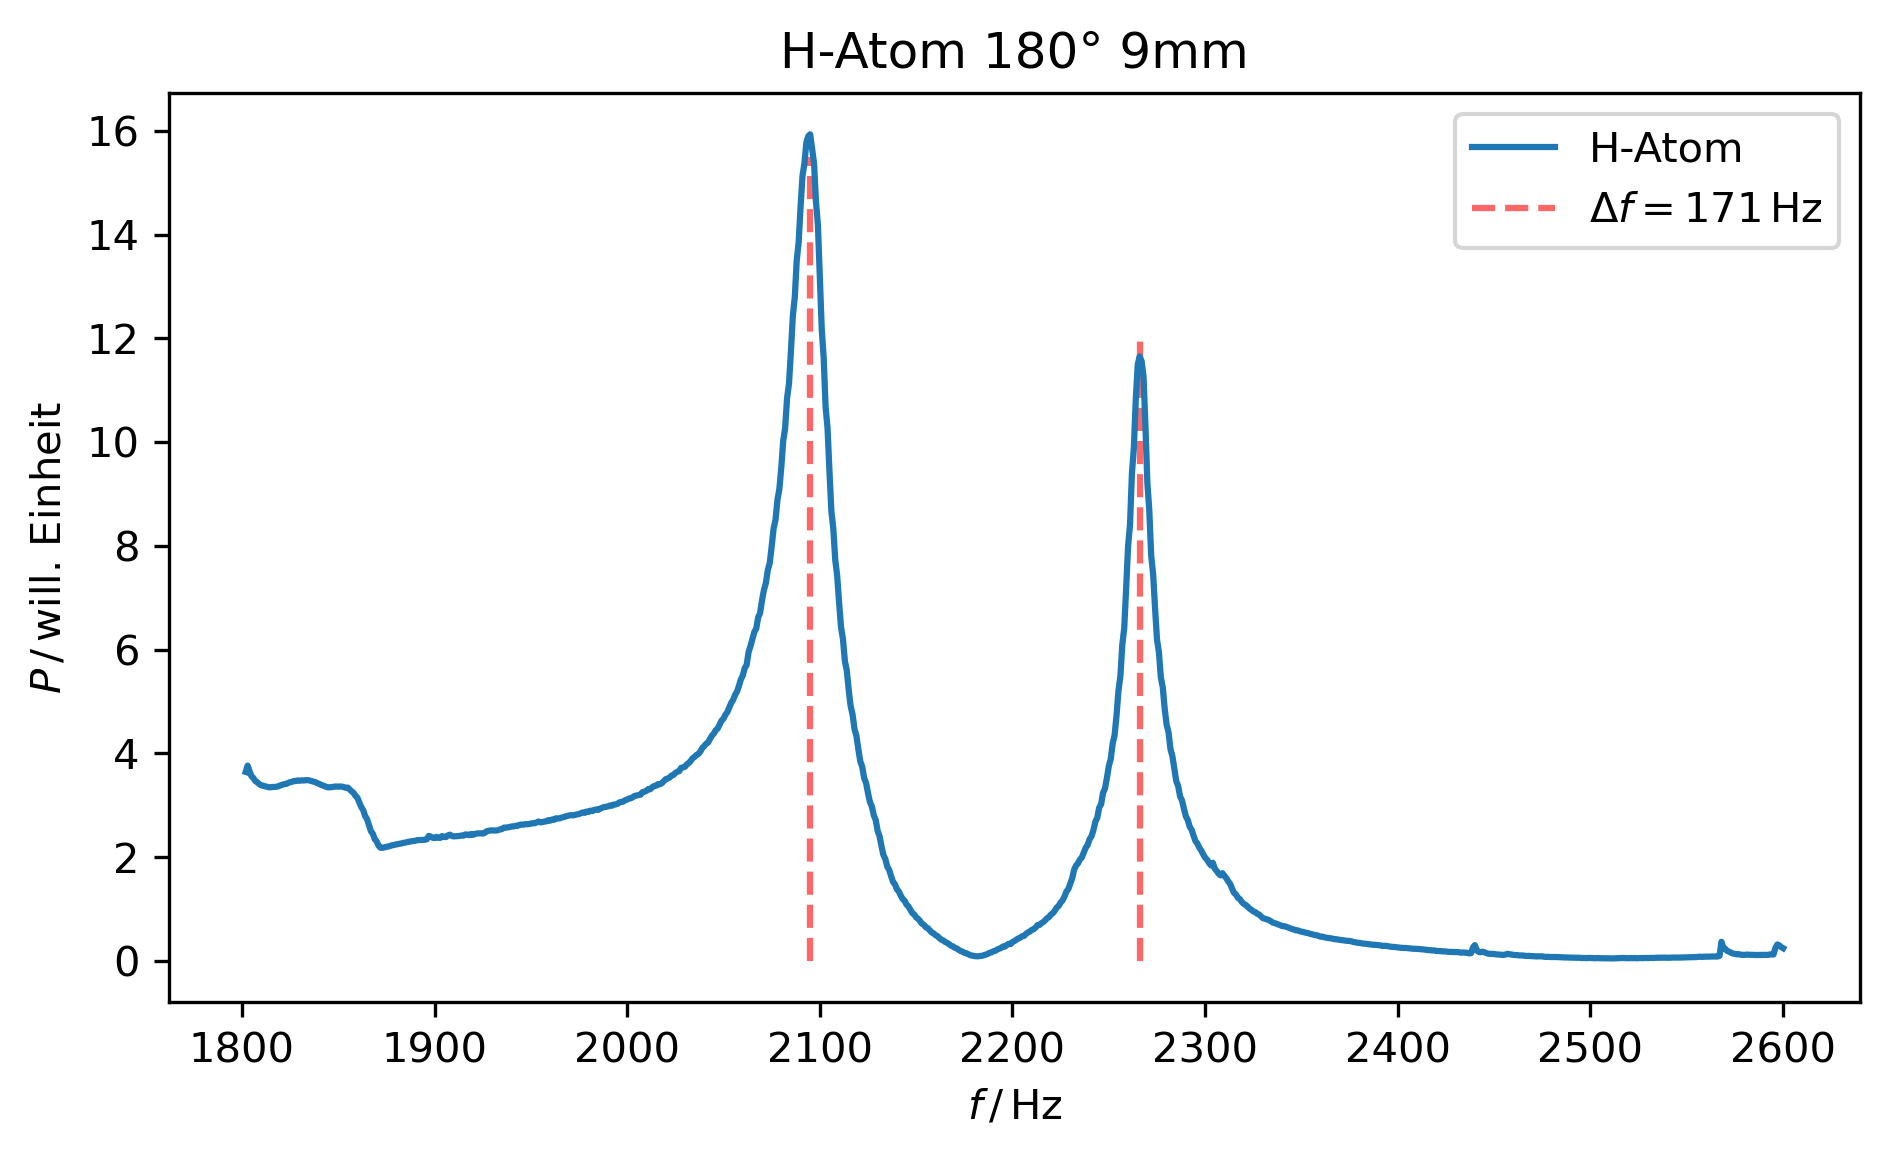

In [5]:
f=np.genfromtxt("data/Wasserstoffatom/Ring/Spektrum_Ring_9mm.dat",skip_header=1,usecols=(0))
D=np.genfromtxt("data/Wasserstoffatom/Ring/Spektrum_Ring_9mm.dat",skip_header=1,usecols=(1))

plt.figure(figsize=(6.4,3.96),dpi=300)
plt.title("H-Atom 180° 9mm")
plt.plot(f,D,label="H-Atom")
vlines(2266, 0, 12, colors='r', linestyles='--',alpha=0.6)
vlines(2095, 0, 15.5, colors='r', linestyles='--',alpha=0.6,label=r"$\Delta f=171\,$Hz")
plt.ylabel(r"$P\,/\,$will. Einheit")
plt.xlabel(r"$f\,/\,$Hz")
plt.legend(loc="best")
plt.tight_layout()
#plt.savefig("plots/Hatom/zustandsaufspaltung_9.pdf",bbox_inches = "tight")
#plt.close()

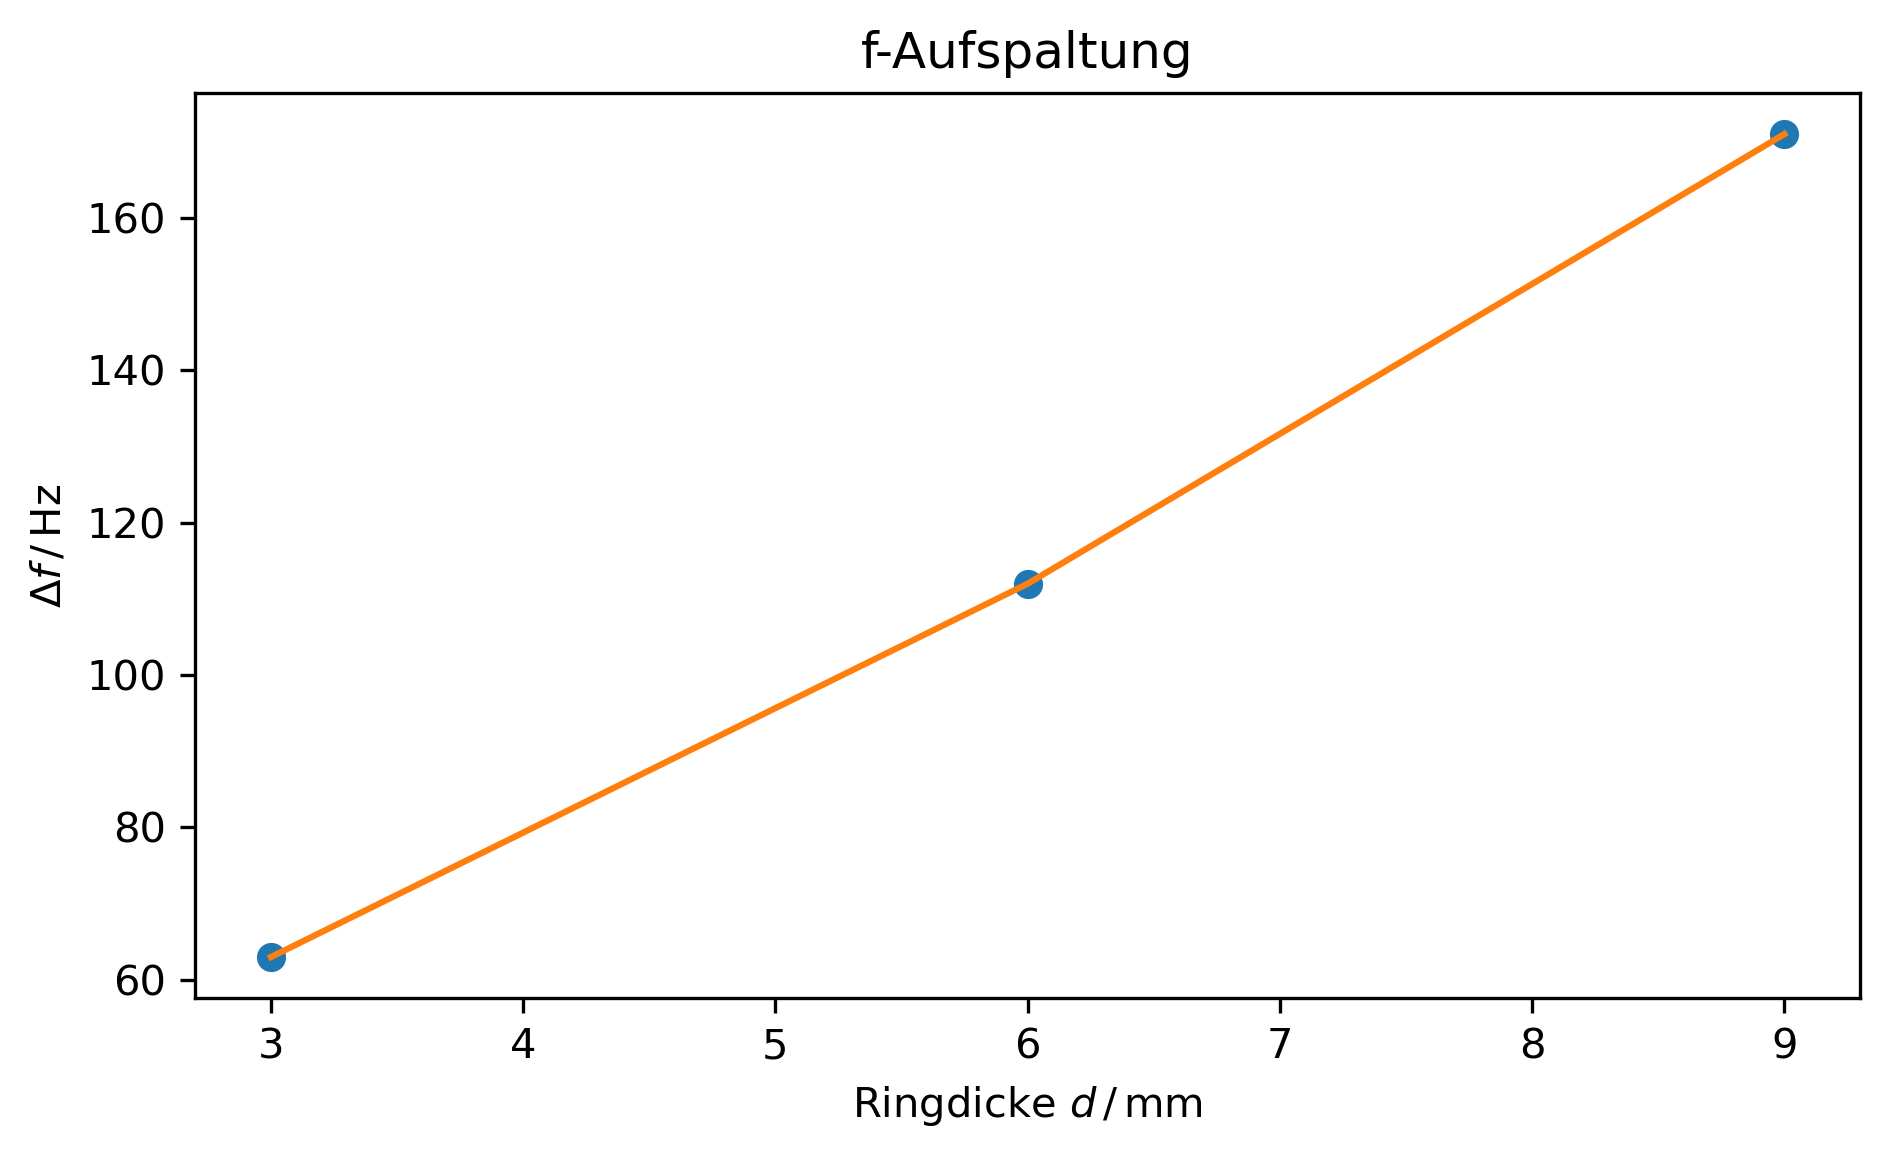

In [6]:
plt.figure(figsize=(6.4,3.96),dpi=300)
plt.title("f-Aufspaltung")
plt.plot([3,6,9],[63,112,171],"o")
plt.plot([3,6,9],[63,112,171],"-")
plt.ylabel(r"$\Delta f\,/\,$Hz")
plt.xlabel(r"Ringdicke $d\,/\,$mm")
plt.tight_layout()
#plt.savefig("plots/Hatom/faufspaltung.pdf",bbox_inches = "tight")
#plt.close()

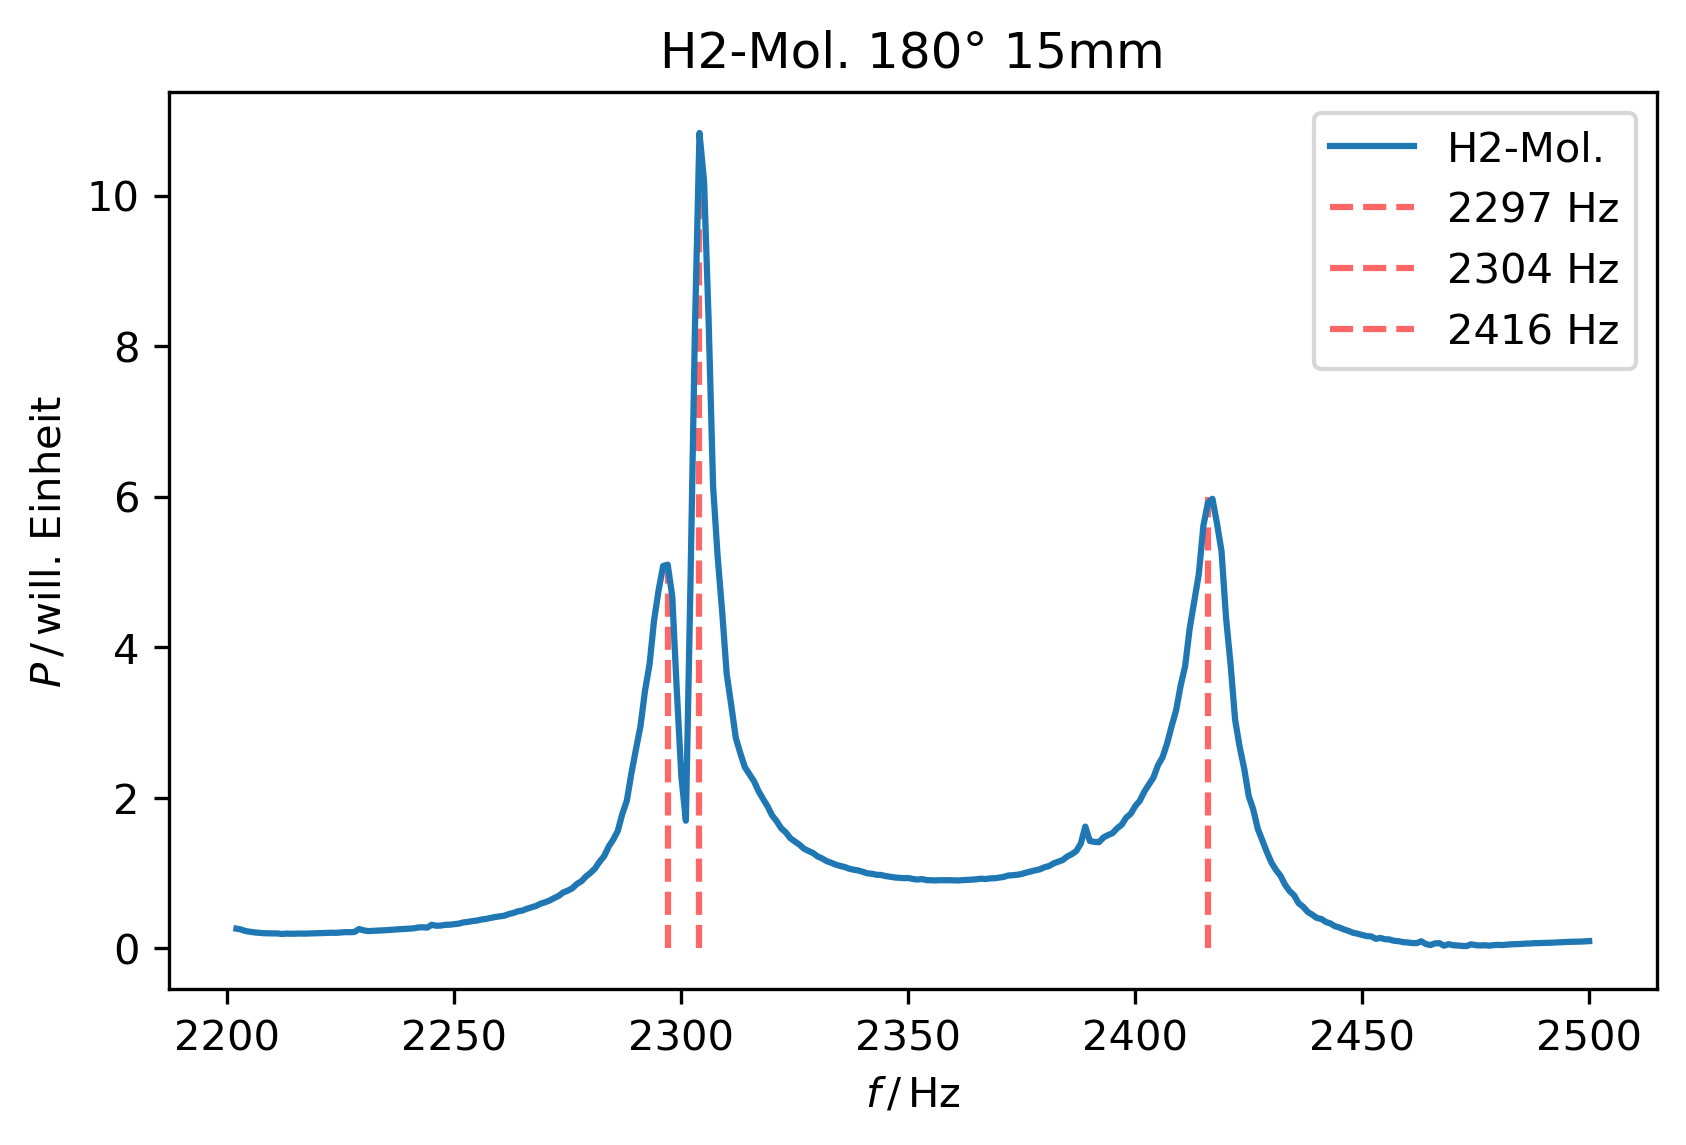

In [7]:
#Wasserstoffmol
f=np.genfromtxt("data/Wasserstoffmolekuel/Spektrum_Ring_15mm.dat",skip_header=1,usecols=(0))
D=np.genfromtxt("data/Wasserstoffmolekuel/Spektrum_Ring_15mm.dat",skip_header=1,usecols=(1))

plt.figure(figsize=(6.4,3.96),dpi=300)
plt.title("H2-Mol. 180° 15mm")
plt.plot(f,D,label="H2-Mol.")
vlines(2297, 0, 5, colors='r', linestyles='--',alpha=0.6,label="2297 Hz")
vlines(2304, 0, 10.5, colors='r', linestyles='--',alpha=0.6,label="2304 Hz")
vlines(2416, 0, 6, colors='r', linestyles='--',alpha=0.6,label="2416 Hz")
plt.ylabel(r"$P\,/\,$will. Einheit")
plt.xlabel(r"$f\,/\,$Hz")
plt.legend(loc="best")
#plt.savefig("plots/Hatom/zustandsaufspaltung_mol15.pdf",bbox_inches = "tight")
#plt.show()
#plt.close()

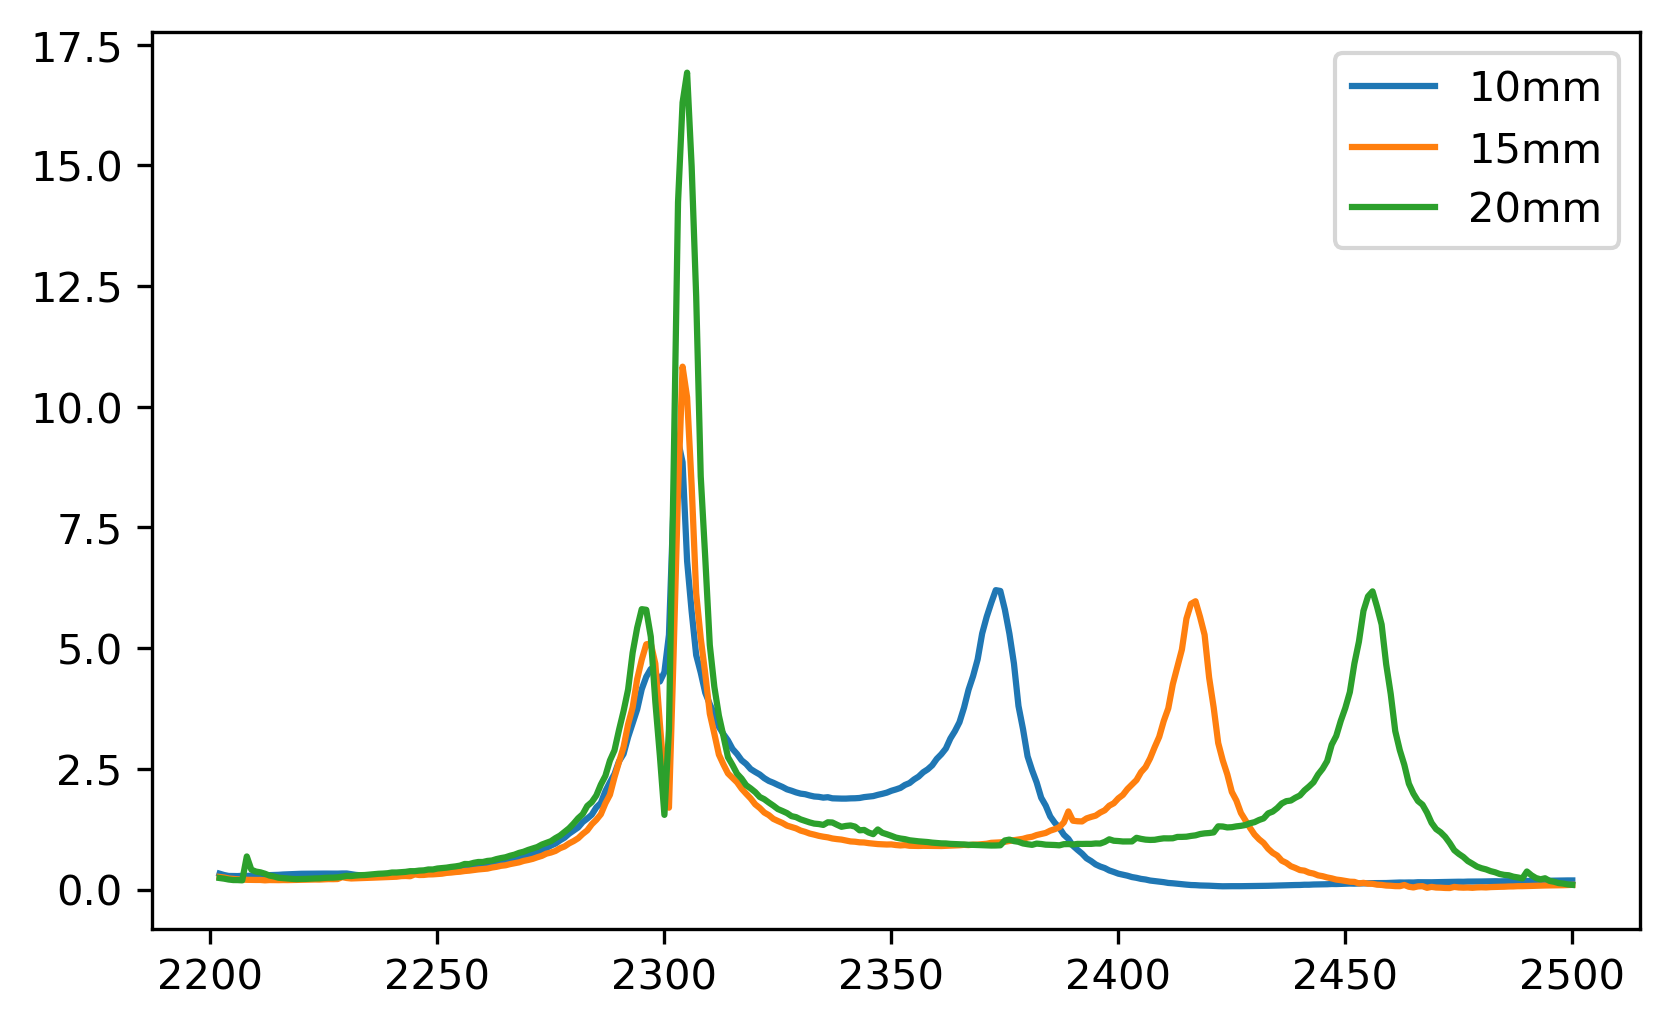

In [8]:
#resonanzfrequenzen plot
f5=np.genfromtxt("data/Wasserstoffmolekuel/Spektrum_Ring_5mm.dat",skip_header=1,usecols=(0))
D5=np.genfromtxt("data/Wasserstoffmolekuel/Spektrum_Ring_5mm.dat",skip_header=1,usecols=(1))
f10=np.genfromtxt("data/Wasserstoffmolekuel/Spektrum_Ring_10mm.dat",skip_header=1,usecols=(0))
D10=np.genfromtxt("data/Wasserstoffmolekuel/Spektrum_Ring_10mm.dat",skip_header=1,usecols=(1))
f15=np.genfromtxt("data/Wasserstoffmolekuel/Spektrum_Ring_15mm.dat",skip_header=1,usecols=(0))
D15=np.genfromtxt("data/Wasserstoffmolekuel/Spektrum_Ring_15mm.dat",skip_header=1,usecols=(1))
f20=np.genfromtxt("data/Wasserstoffmolekuel/Spektrum_Ring_20mm.dat",skip_header=1,usecols=(0))
D20=np.genfromtxt("data/Wasserstoffmolekuel/Spektrum_Ring_20mm.dat",skip_header=1,usecols=(1))

plt.figure(figsize=(6.4,3.96),dpi=300)
#plt.plot(f5,D5,label="5mm")
plt.plot(f10,D10,label="10mm")
plt.plot(f15,D15,label="15mm")
plt.plot(f20,D20,label="20mm")
plt.legend()
#plt.close()

In [9]:
d=[10,15,20]
R1=[2295,2295,2295]#1. Resonanz
R2=[2303,2304,2305]#2. Resonanz
R3=[2374,2417,2456]#2. Resonanz

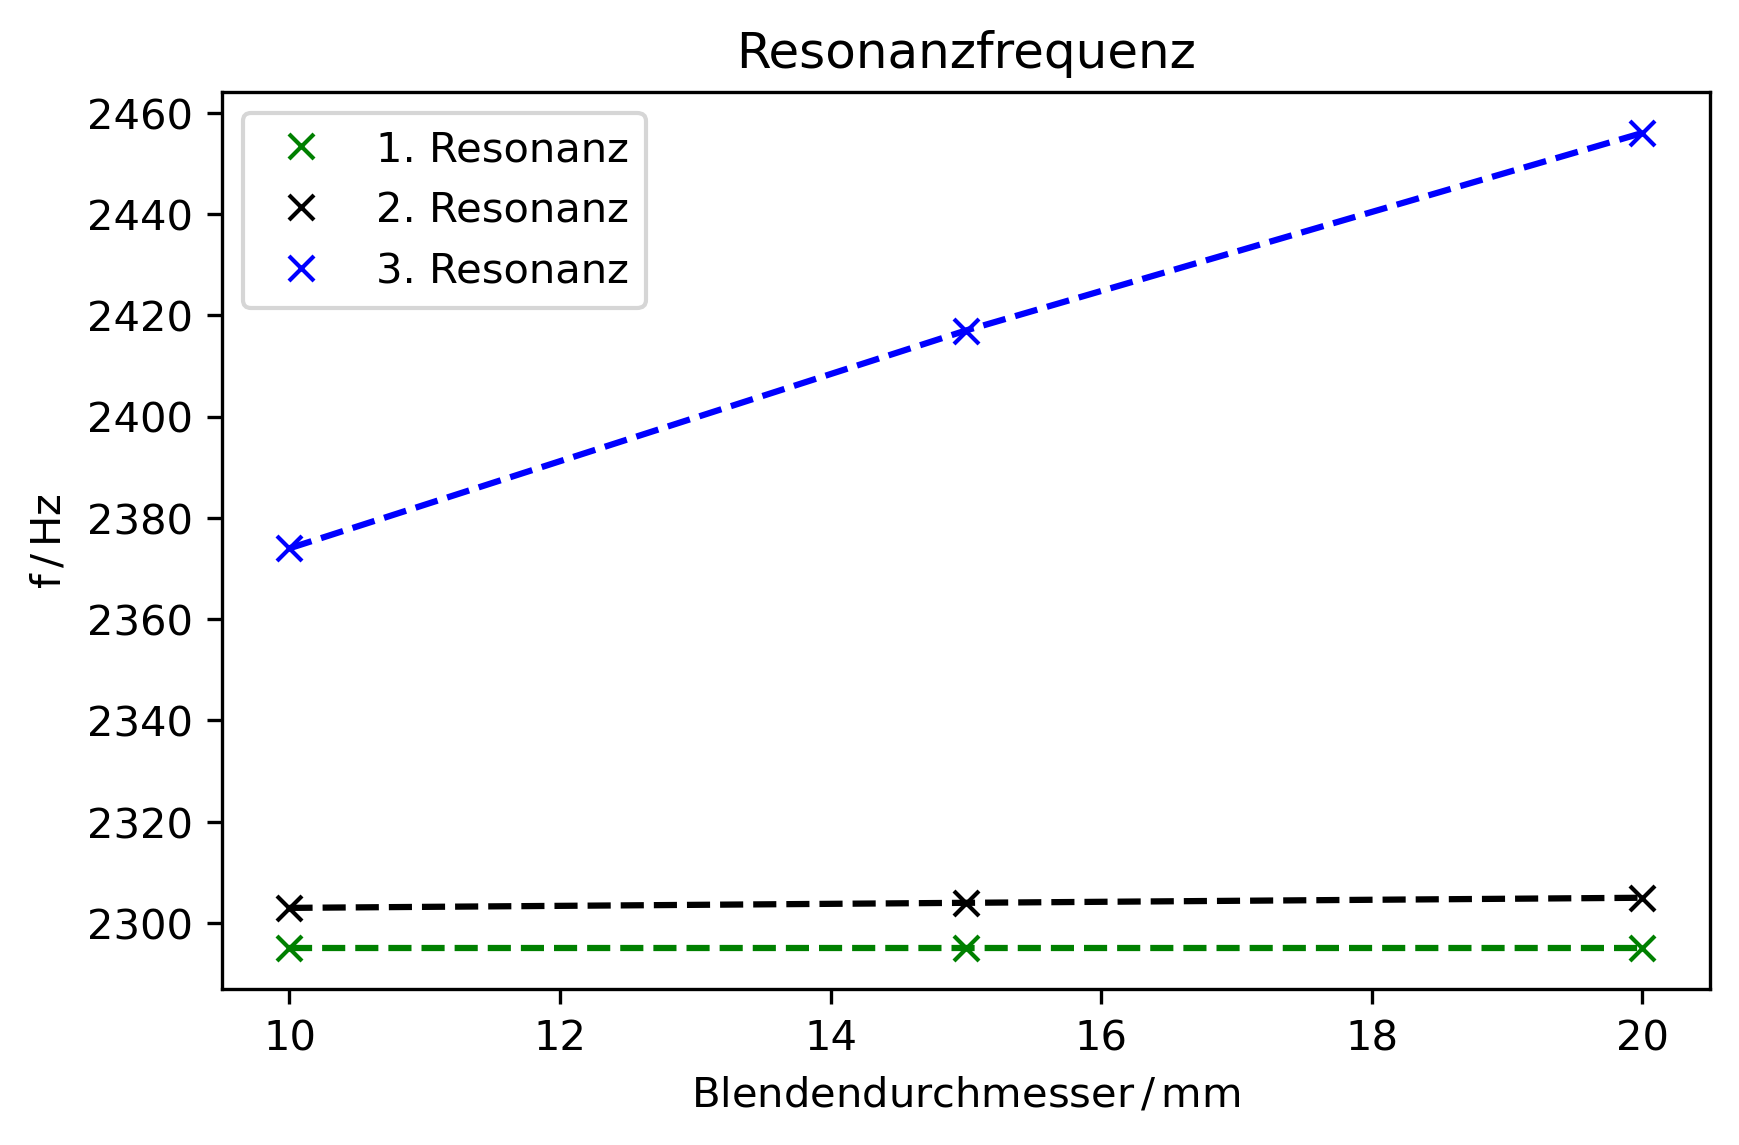

In [10]:
plt.figure(figsize=(6.4,3.96),dpi=300)
plt.title("Resonanzfrequenz")
plt.plot(d,R1,"xg",label="1. Resonanz")
plt.plot(d,R1,"--g")
plt.plot(d,R2,"xk",label="2. Resonanz")
plt.plot(d,R2,"--k")
plt.plot(d,R3,"xb",label="3. Resonanz")
plt.plot(d,R3,"--b")
plt.ylabel(r"f$\,/\,$Hz")
plt.xlabel(r"Blendendurchmesser$\,/\,$mm")
plt.legend(loc="best")
#plt.savefig("plots/Hatom/res_blende.pdf",bbox_inches = "tight")
#plt.show()
#plt.close()